### Common data problems

In [35]:
# Importing librairies 
import pandas as pd 
import numpy as np

# Importing Dataset
ride_sharing = pd.read_csv('ride_sharing_new.csv', header=0, index_col='Unnamed: 0')

# Show the first 10 lines of the DataFrame
print(ride_sharing.head())

     duration  station_A_id  \
0  12 minutes            81   
1  24 minutes             3   
2   8 minutes            67   
3   4 minutes            16   
4  11 minutes            22   

                                      station_A_name  station_B_id  \
0                                 Berry St at 4th St           323   
1       Powell St BART Station (Market St at 4th St)           118   
2  San Francisco Caltrain Station 2  (Townsend St...            23   
3                            Steuart St at Market St            28   
4                              Howard St at Beale St           350   

                    station_B_name  bike_id  user_type  user_birth_year  \
0               Broadway at Kearny     5480          2             1959   
1  Eureka Valley Recreation Center     5193          2             1965   
2    The Embarcadero at Steuart St     3652          3             1993   
3     The Embarcadero at Bryant St     1883          1             1979   
4             8th

In [18]:
# Print the information of ride_sharing
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None


In [19]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


THE "user-type" COLUMN HAS AN FINTE STE OF POSSIBLE VALUES THAT REPRESENT GROUPINGS OF DATA, IT SHOULD BE CONVERTED TO "category"

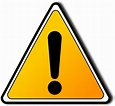

##### Summing strings and concatenating numbers

In [20]:
# Print the information of ride_sharing
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None


In [21]:
# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64


In [22]:
# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

In [23]:
# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

No Error so everything is supposed to be okey, Let's check

In [24]:
# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dtype: int64


In [25]:
# Check duration type
ride_sharing['duration'].head()

0    12 minutes
1    24 minutes
2     8 minutes
3     4 minutes
4    11 minutes
Name: duration, dtype: object

In [26]:
ride_sharing['duration'].dtype == 'int'

False

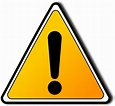

Duration type is object, but it should be integer isn't ? 

Let's correct it

In [27]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

In [28]:
# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']], end="\n \n")

print("the average ride duration's : \t", ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
 
the average ride duration's : 	 11.389052795031056


##### Tire size constraints

Let's make sure the tire_sizes column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In [29]:
# Define the tire sizes and their probabilities
tire_sizes = ["26", "27", "29"]
probabilities = [0.4, 0.4, 0.2]  # Adjust the probabilities as needed

# Add a new column 'tire_sizes' with random distributions
ride_sharing['tire_sizes'] = np.random.choice(tire_sizes, size=len(ride_sharing), p=probabilities)

# Convert user_type from integer to category
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print the updated DataFrame infos
print(ride_sharing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       25760 non-null  int64   
 1   duration         25760 non-null  object  
 2   station_A_id     25760 non-null  int64   
 3   station_A_name   25760 non-null  object  
 4   station_B_id     25760 non-null  int64   
 5   station_B_name   25760 non-null  object  
 6   bike_id          25760 non-null  int64   
 7   user_type        25760 non-null  int64   
 8   user_birth_year  25760 non-null  int64   
 9   user_gender      25760 non-null  object  
 10  user_type_cat    25760 non-null  category
 11  duration_trim    25760 non-null  object  
 12  duration_time    25760 non-null  int32   
 13  tire_sizes       25760 non-null  category
dtypes: category(2), int32(1), int64(6), object(5)
memory usage: 2.3+ MB
None


In [30]:
print(ride_sharing['tire_sizes'].head())

0    27
1    27
2    26
3    27
4    27
Name: tire_sizes, dtype: category
Categories (3, object): ['26', '27', '29']


In [31]:
# Strip " ' "
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].str.strip("'")

# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

count     25760
unique        2
top          27
freq      15482
Name: tire_sizes, dtype: int64


##### Finding duplicates

In [36]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset='bike_id', keep=False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('bike_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['bike_id','duration','user_birth_year']])

       bike_id    duration  user_birth_year
3638        11  12 minutes             1988
6088        11   5 minutes             1985
10857       11   4 minutes             1987
10045       27  13 minutes             1989
16104       27  10 minutes             1970
...        ...         ...              ...
8812      6638  10 minutes             1986
6815      6638   5 minutes             1995
8456      6638   7 minutes             1983
8300      6638   6 minutes             1962
8380      6638   8 minutes             1984

[25717 rows x 3 columns]


##### Treating duplicates

In [40]:
# Strip duration of minutes
ride_sharing['duration'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration'] = ride_sharing['duration'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration'].dtype == 'int'

In [41]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('bike_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'bike_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0